In [1]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt

In [2]:
%cd D:Download/

D:\Download


In [5]:
import numpy as np
from math import *
M1=[]

Inp1=[1.037,
5.032333333,
10.02,
14.99333333,
20.78,
25.22333333,
30.39,
34.76666667,
39.81666667,
43.92333333,
47.57]

M2=[]

Inp2=[1.012333333,
4.864333333,
9.645,
14.03333333,
18.80666667,
22.81333333,
27.58333333,
31.79666667,
37.15666667,
42.86,
46.03666667]

D0=[]

InpD0=[2.977666667,
14.4,
28.70333333,
41.82666667,
53.02666667,
59.95333333,
73.78666667,
87.59333333,
108.3333333,
127.7,
136.3]

InpD0=np.array(InpD0)/sqrt(2)



In [6]:
import pandas as pd
def c(inp1,mplusmean):
  temp1= (inp1*10**-6)/10**6
  energy= (1.28*(10**-19))
  temp2= temp1/energy
  convf1= temp2/mplusmean
  return(convf1)
def fhom(n0,n1,n2,n3):
  temp = ((n3)**4)/(6*(n0+1)*(n0+2))
  return(temp)

def dhom(n0,n1,n2,n3): #sample mean
  temp1= fhom(n0,n1,n2,n3)/(n0+n2+n1+1)
  return(temp1)

def xphi(n0,n1,n2,n3): 
  temp3= (n3)/((2*(n1+n2+n0+1))**0.5)
  return(temp3)

In [7]:
temp4_base=np.load('0uw_weited.npy')   

In [8]:
file = [5,10,15,20,25,30,35,40,45,50]

In [49]:
D_list=[]
X_list=[]
X2_list=[]
X22_list=[]

M1_list=[]
M2_list=[]
M3_list=[]
M4_list=[]

C1_list=[]
C2_list=[]
C0_list=[]
C4_list=[]


for i in range(len(file)):
    temp1=np.load(str(file[i])+'uw+.npy')    
    temp2=np.load(str(file[i])+'uw-.npy')    
    temp3=np.load(str(file[i])+'uwd.npy')    
    temp4=np.load(str(file[i])+'uw_weited.npy')    
    
    c1_mean=sum(temp1)/len(temp1) #mean of M+
    c2_mean=sum(temp2)/len(temp2) #mean of M-
    c0_mean=sum(temp3)/len(temp3) #mean of D0

    c1_temp=c(Inp1[i],c1_mean) #conversion coefficient for M+
    c2_temp=c(Inp2[i],c2_mean) #conversion coefficient for M-
    c0_temp=c(InpD0[i],c0_mean) #conversion coefficient for D0

    C1_list.append(c1_temp)
    C2_list.append(c2_temp)
    C0_list.append(c0_temp)

    
    temp10= np.array(temp1)*c1_temp #converte M+ in photon number unite
    temp20= np.array(temp2)*c2_temp #converte M- in photon number unite
    temp30= np.array(temp3)*c0_temp #converte D0 in photon number unite
    
    mean1=sum(temp10)/len(temp10) #mean photon number of M+
    mean2=sum(temp20)/len(temp20) #mean photon number of M-
    mean3=sum(temp30)/len(temp30) #mean photon number of D0
    
    M1_list.append(mean1)
    M2_list.append(mean2)
    M3_list.append(mean3)

    
    c_rf=sqrt((mean1+mean2)/(np.var(temp4)-np.var(temp4_base))) #conversion coefficient for RF
    temp40=temp4*c_rf
    
    C4_list.append(c_rf)

    
    mean4=sum(temp40)/len(temp40) #mean photon number of RF

    M4_list.append(mean4)

    
    D=0
    X=0
    X2=0
    X22=0
    
    for k in range(len(temp10)):
        D+=dhom(temp30[k],temp10[k],temp20[k],temp40[k])/len(temp10)
        X+=xphi(temp30[k],temp10[k],temp20[k],temp40[k])/len(temp10)
        X2+=xphi(temp30[k],temp10[k],temp20[k],temp40[k])**2/len(temp10)
        X22+=abs(0.25-xphi(temp30[k],temp10[k],temp20[k],temp40[k])**2)/len(temp10)
        
    D_list.append(D)
    X_list.append(X)
    X2_list.append(X2)
    X22_list.append(X22)
    print(i)

0
1
2
3
4
5
6
7
8
9


In [59]:
D_list

[9.861201333400325e-07,
 5.074320508302758e-08,
 1.5075650729177405e-08,
 7.50035317094262e-09,
 4.51509714399607e-09,
 3.199384142506116e-09,
 2.272613673122045e-09,
 1.6017681871224024e-09,
 1.1136960296327116e-09,
 8.566360653444786e-10]

In [58]:
X_list

[0.00016482542201401798,
 -5.3569215184205695e-05,
 -3.4387261810982183e-05,
 -3.769855732495665e-05,
 -1.7894926025361364e-05,
 1.051231679139658e-05,
 3.2286083462404992e-06,
 -1.2108234797588073e-06,
 7.826780780260598e-06,
 8.219628062736117e-06]

In [60]:
X2_list

[1.9625982967688362,
 0.9985482490728038,
 0.7767448464811105,
 0.6596065449217811,
 0.5648442160078704,
 0.49676197400171845,
 0.469191469470066,
 0.4330742697404348,
 0.4085861861868959,
 0.391430019323836]

In [53]:
X22_list

[48.94136316077957,
 0.8943662610222561,
 0.7914012547643233,
 8.4044554149632,
 1.7009097050291138,
 1.8727956346908285,
 176.38795977049517,
 1.9700127236670257,
 8.693606023376498,
 93.18222227024002]

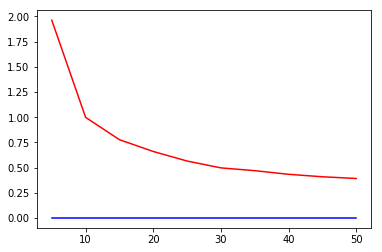

In [62]:
plt.plot(file,D_list,color="blue", label='d_hom')
plt.plot(file,X2_list,color="red", label='x_phi')

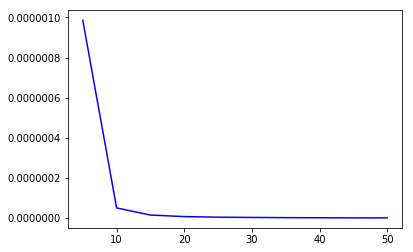

In [63]:
plt.plot(file,D_list,color="blue", label='d_hom')

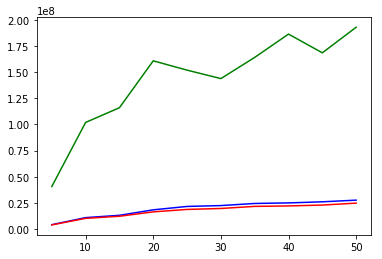

In [42]:
plt.plot(file,C1_list,color="blue", label='C1')
plt.plot(file,C2_list,color="red", label='C2')
plt.plot(file,C0_list,color="green", label='C0')

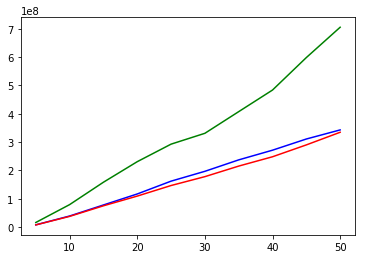

In [32]:
plt.plot(file,M1_list,color="blue", label='C1')
plt.plot(file,M2_list,color="red", label='C2')
plt.plot(file,M3_list,color="green", label='C0')

In [33]:
M1_list

[8101562.50000015,
 39315104.164062224,
 78281249.99999946,
 117135416.64062263,
 162343750.000004,
 197057291.6406224,
 237421874.99997118,
 271614583.3593691,
 311067708.35938674,
 343151041.640617]

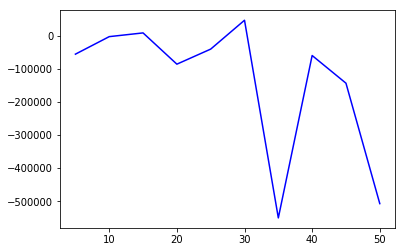

In [61]:
plt.plot(file,M4_list,color="blue", label='C4')

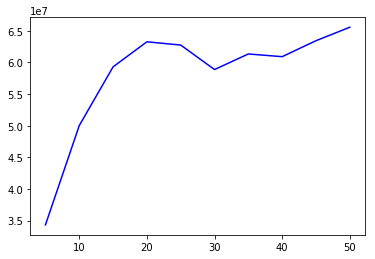

In [38]:
plt.plot(file,C4_list,color="blue", label='C4')

In [57]:
D_list=[]
X_list=[]
X2_list=[]
X22_list=[]

M1_list=[]
M2_list=[]
M3_list=[]
M4_list=[]

C1_list=[]
C2_list=[]
C0_list=[]
C4_list=[]


for i in range(len(file)):
    temp1=np.load(str(file[i])+'uw+.npy')    
    temp2=np.load(str(file[i])+'uw-.npy')    
    temp3=np.load(str(file[i])+'uwd.npy')    
    temp4=np.load(str(file[i])+'uw_weited.npy')    
    
    c1_mean=sum(temp1)/len(temp1) #mean of M+
    c2_mean=sum(temp2)/len(temp2) #mean of M-
    c0_mean=sum(temp3)/len(temp3) #mean of D0

    c1_temp=c(Inp1[i],c1_mean) #conversion coefficient for M+
    c2_temp=c(Inp2[i],c2_mean) #conversion coefficient for M-
    c0_temp=c(InpD0[i],c0_mean) #conversion coefficient for D0

    C1_list.append(c1_temp)
    C2_list.append(c2_temp)
    C0_list.append(c0_temp)

    
    temp10= np.array(temp1)*c1_temp #converte M+ in photon number unite
    temp20= np.array(temp2)*c2_temp #converte M- in photon number unite
    temp30= np.array(temp3)*c0_temp #converte D0 in photon number unite
    
    mean1=sum(temp10)/len(temp10) #mean photon number of M+
    mean2=sum(temp20)/len(temp20) #mean photon number of M-
    mean3=sum(temp30)/len(temp30) #mean photon number of D0
    
    M1_list.append(mean1)
    M2_list.append(mean2)
    M3_list.append(mean3)

    
    c_rf=sqrt((mean1+mean2)/(np.var(temp4)-np.var(temp4_base))) #conversion coefficient for RF
    temp40=temp4*c_rf
    
    C4_list.append(c_rf)

    
    mean4=sum(temp40)/len(temp40) #mean photon number of RF

    M4_list.append(mean4)
    
    temp40=temp40-mean4 # RF data is regularized by subtracting mean photon number 

    
    D=0
    X=0
    X2=0
    X22=0
    
    for k in range(len(temp10)):
        D+=dhom(temp30[k],temp10[k],temp20[k],temp40[k])/len(temp10)
        X+=xphi(temp30[k],temp10[k],temp20[k],temp40[k])/len(temp10)
        X2+=xphi(temp30[k],temp10[k],temp20[k],temp40[k])**2/len(temp10)
        X22+=abs(0.25-xphi(temp30[k],temp10[k],temp20[k],temp40[k])**2)/len(temp10)
        
    D_list.append(D)
    X_list.append(X)
    X2_list.append(X2)
    X22_list.append(X22)
    print(i)

0
1
2
3
4
5
6
7
8
9
